<a href="https://colab.research.google.com/github/singhsweta/Data-ANZ-Virtual-Internship/blob/main/EDA_ANZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EXPLORATORY DATA ANALYSIS**


The Dataset that was given to us is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights we will gather will be genuine. 


In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#plt.style.available


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [ ]:
#loading the data
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

### Viewing the first 5 rows of our data 
data.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
## Descriptive Statistical Analysis of our data
data.describe(include= 'all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,12043.000000,12043,12043,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,NaN,91,2,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,NaN,2018-09-28 00:00:00,M,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,1a954ee6471e46759bd3548b1b414e4e,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,NaN,174,6285,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,14704.195553,NaN,NaN,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,31503.722652,NaN,NaN,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.240000,NaN,NaN,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3158.585000,NaN,NaN,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.shape)

(12043, 23)


From the above observation we confirm that the dataset contains 100 unique accounts. 12043 transactions and 23 features.

Now after careful analysis we also observe that some of these features are not required for our analysis. So, we are dropping irrelevant features and keeping only those features that adds value to our analysis.



In [ ]:
#loading only the relevant columns
data=data[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]

data.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   balance            12043 non-null  float64       
 3   date               12043 non-null  datetime64[ns]
 4   gender             12043 non-null  object        
 5   age                12043 non-null  int64         
 6   merchant_suburb    7717 non-null   object        
 7   merchant_state     7717 non-null   object        
 8   amount             12043 non-null  float64       
 9   customer_id        12043 non-null  object        
 10  movement           12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
#Finding Blanks
data.isnull().sum()

All columns except card_present_flag ,merchant_suburb ,merchant_state have no blanks

### **Customer transaction count for each day.**

In [ ]:
count_trans=data.groupby(by="date").count()
avg_trans=count_trans["customer_id"].mean()
n_points=len(count_trans.index)
print(count_trans)
print("the average transaction per day is",avg_trans)

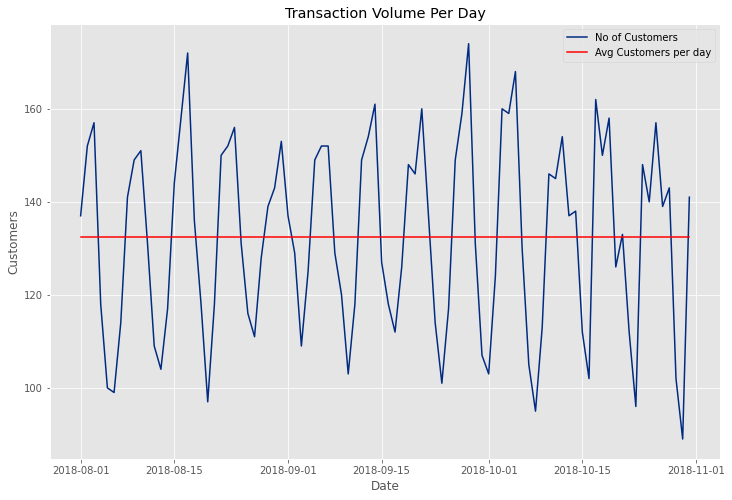

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(count_trans.index,count_trans["customer_id"],color="#002b80",label="No of Customers")
plt.plot(count_trans.index,np.linspace(avg_trans,avg_trans,n_points),color="r",label="Avg Customers per day")
plt.title("Transaction Volume Per Day")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.legend()
plt.show()

### Total transaction amount for each day.

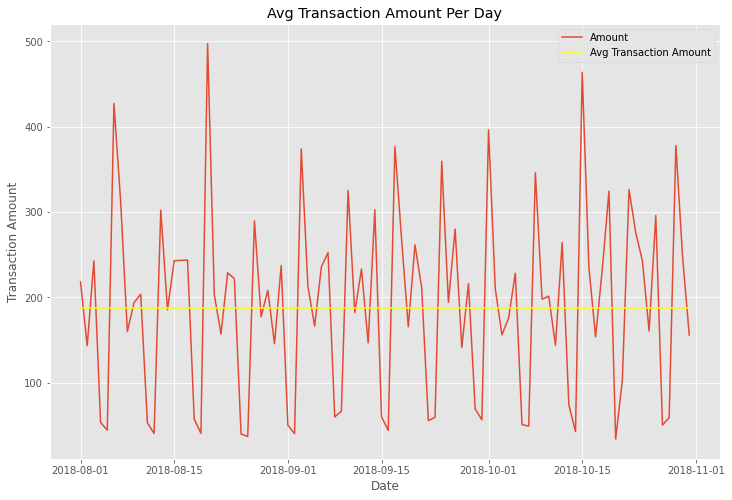

In [ ]:
data_date_mean=data.groupby("date").mean()
avg_trans_amount=data["amount"].mean()
n_points=len(data_date_mean)


plt.figure(figsize=(12,8))
plt.plot(data_date_mean.index,data_date_mean["amount"],label="Amount")
plt.plot(data_date_mean.index,np.linspace(avg_trans_amount,avg_trans_amount,n_points),color="yellow",label="Avg Transaction Amount")
plt.title("Avg Transaction Amount Per Day")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()
plt.show()

### **Gender Wise Customer Distribution**

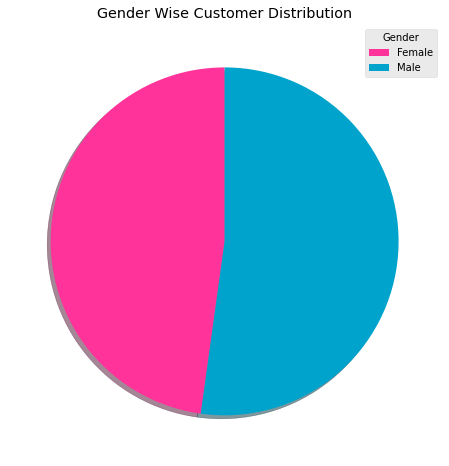

In [ ]:
gender=data.groupby("gender").count()
mycolor=["#ff3399","#00a3cc"]

plt.figure(figsize=(12,8))
plt.pie(gender["customer_id"],colors=mycolor,startangle=90,shadow=True) #explode[0.2,0]
plt.legend(title="Gender",labels=["Female","Male"])
plt.title("Gender Wise Customer Distribution")
plt.show()

## **Transaction Amount By Age**

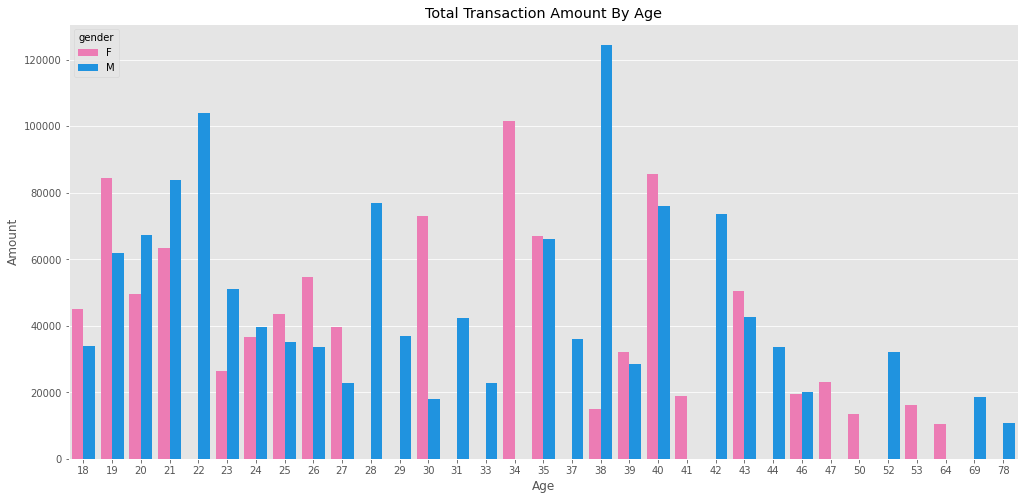

In [ ]:
age_amount=data.groupby(["age","gender"])["amount"].sum().reset_index()
palatte={"F":"hotpink","M":"#0099ff"}

plt.figure(figsize=(17,8))
sns.barplot(x="age",y="amount",hue="gender",data=age_amount,palette=palatte)
plt.title("Total Transaction Amount By Age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()



### **Movement By Debit/Credit**

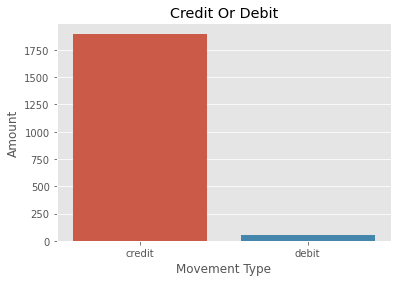

In [ ]:
debitorcredit=data.groupby("movement")["amount"].mean().reset_index()

sns.barplot(x="movement",y="amount",data=debitorcredit)
plt.title("Credit Or Debit")
plt.xlabel("Movement Type")
plt.ylabel("Amount")
plt.show()

In [ ]:
debitorcredit

,movement,amount
0,credit,1898.728029
1,debit,52.572343


### **Transaction Amount for each month**

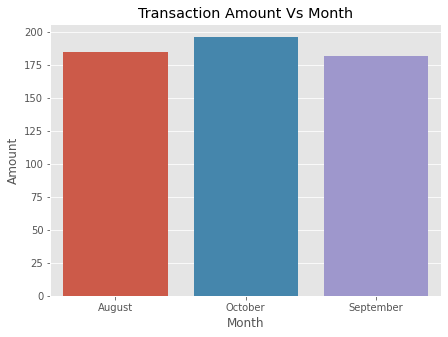

In [ ]:

month_amt=data.groupby(data["date"].dt.strftime('%B'))["amount"].mean().reset_index()
month_amt

plt.figure(figsize=(7,5))
sns.barplot(x="date",y="amount",data=month_amt)
plt.title("Transaction Amount Vs Month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()

